## Automatic Number Plate Recognition Sytem With 

 + EasyOCR
 + Open CV 
 + imutils 

## Steps includes

  + **Reading the image in Grayscale abd Blur**  
  + **Applying filter and find Edges for lacalization**  
  + **Finding Contours and Applying Mask on the Image**  
  + **Use Easy OCR to read text in the image**  
  + **Render Result on the image**  
  + **Build a Number plate Detection system**

### Importing the Neccessary Libraries 

In [1]:
import cv2
import easyocr
import imutils
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as mpimg 

### Reading the Image 

In [2]:
def gray_img_display(): 
    plt.figure(figsize=(10,5))
    image = cv2.imread(input("Enter image path"))
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
    plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))
    plt.show()

    

def color_img_display():
    plt.figure(figsize=(10,5))
    image = mpimg.open(input("Enter image path"))
    plt.imshow(image)

Enter image pathNumberPlate4.jpg


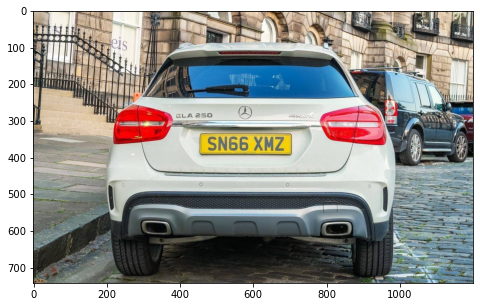

In [3]:
# Displaying colored image 

color_img_display()

Enter image pathNumberPlate1.jpg


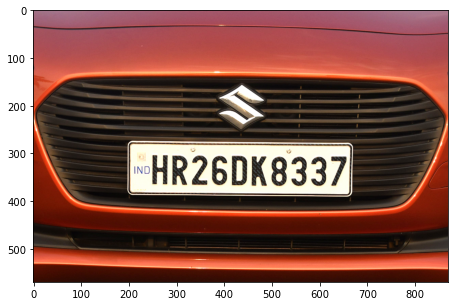

In [45]:
# Displaying Gray image 

color_img_display()

Enter image pathNumberPlate8.jpg


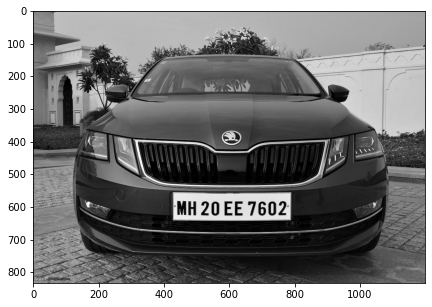

In [44]:
gray_img_display()

### Applying Filter and Finding Edges in the image for localization 

In [24]:
image = cv2.imread("NumberPlate8.jpg")
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 

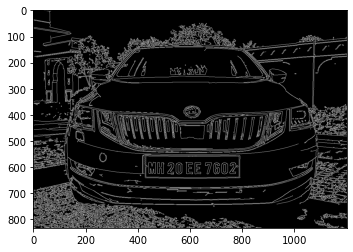

In [25]:
# Reducing the Noise in the image by appklying the bilateral Filter with cV2 
bfilter = cv2.bilateralFilter(gray,11,17,17)

# Finding the Egdes in the filtered Image 
Edges = cv2.Canny(bfilter,30,200)

# Displaying the Edges in the image 
plt.imshow(cv2.cvtColor(Edges,cv2.COLOR_BGR2RGB))
plt.show()


In [26]:
print(Edges)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


### Finding Contours and Applying Mask on the Edged image

In [27]:
keypoints = cv2.findContours(Edges.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# cv2.RETR_TREE returns the result in Tree format and allow us to treverse tree in different contours 
# cv2.CHAIN_APPROX_SIMPLE returns a simplified version of the contour 

In [28]:
print(keypoints)

((array([[[586, 832]],

       [[587, 832]]], dtype=int32), array([[[379, 832]]], dtype=int32), array([[[309, 832]],

       [[310, 832]]], dtype=int32), array([[[290, 832]]], dtype=int32), array([[[284, 832]]], dtype=int32), array([[[162, 832]],

       [[163, 832]]], dtype=int32), array([[[136, 832]]], dtype=int32), array([[[ 28, 832]],

       [[ 29, 832]]], dtype=int32), array([[[829, 831]],

       [[829, 832]],

       [[830, 831]],

       [[832, 831]],

       [[833, 832]],

       [[832, 831]]], dtype=int32), array([[[452, 831]],

       [[451, 832]],

       [[452, 831]],

       [[453, 831]],

       [[454, 832]],

       [[453, 831]]], dtype=int32), array([[[315, 831]],

       [[316, 832]],

       [[318, 832]],

       [[319, 831]],

       [[320, 831]],

       [[321, 832]],

       [[321, 831]],

       [[319, 831]],

       [[318, 832]],

       [[316, 832]]], dtype=int32), array([[[189, 831]],

       [[190, 832]],

       [[190, 831]]], dtype=int32), array([[[ 93, 83

In [29]:
# Using Imutils to find the contours from the keypoints 

contours = imutils.grab_contours(keypoints)

In [30]:
print(contours)

(array([[[586, 832]],

       [[587, 832]]], dtype=int32), array([[[379, 832]]], dtype=int32), array([[[309, 832]],

       [[310, 832]]], dtype=int32), array([[[290, 832]]], dtype=int32), array([[[284, 832]]], dtype=int32), array([[[162, 832]],

       [[163, 832]]], dtype=int32), array([[[136, 832]]], dtype=int32), array([[[ 28, 832]],

       [[ 29, 832]]], dtype=int32), array([[[829, 831]],

       [[829, 832]],

       [[830, 831]],

       [[832, 831]],

       [[833, 832]],

       [[832, 831]]], dtype=int32), array([[[452, 831]],

       [[451, 832]],

       [[452, 831]],

       [[453, 831]],

       [[454, 832]],

       [[453, 831]]], dtype=int32), array([[[315, 831]],

       [[316, 832]],

       [[318, 832]],

       [[319, 831]],

       [[320, 831]],

       [[321, 832]],

       [[321, 831]],

       [[319, 831]],

       [[318, 832]],

       [[316, 832]]], dtype=int32), array([[[189, 831]],

       [[190, 832]],

       [[190, 831]]], dtype=int32), array([[[ 93, 831

In [31]:
# Sorting the result 

contours = sorted(contours,key = cv2.contourArea, reverse = True)[:10]

In [32]:
print(contours)

[array([[[323, 399]],

       [[321, 401]],

       [[321, 402]],

       [[320, 403]],

       [[320, 404]],

       [[321, 405]],

       [[321, 409]],

       [[322, 410]],

       [[322, 413]],

       [[323, 414]],

       [[323, 418]],

       [[324, 419]],

       [[324, 423]],

       [[325, 424]],

       [[325, 427]],

       [[326, 428]],

       [[326, 432]],

       [[327, 433]],

       [[327, 436]],

       [[328, 437]],

       [[328, 440]],

       [[329, 441]],

       [[329, 444]],

       [[330, 445]],

       [[330, 449]],

       [[331, 450]],

       [[331, 453]],

       [[332, 454]],

       [[332, 457]],

       [[333, 458]],

       [[333, 461]],

       [[334, 462]],

       [[334, 465]],

       [[335, 466]],

       [[335, 469]],

       [[336, 470]],

       [[336, 473]],

       [[337, 474]],

       [[337, 477]],

       [[338, 478]],

       [[338, 480]],

       [[339, 481]],

       [[339, 484]],

       [[340, 485]],

       [[340, 487]],

       [[

### Location of the Number plate on the image 
+ Using cv2 ApproxPolyDp

In [33]:
# Location 
location = None 

# iterating through the sorted contours 
for contour in contours:
    # setting 10 as the finess of the contour. Using [approxPolyDP] to Approximate polygons from contours.
    approx = cv2.approxPolyDP(contour,10,True)
    if len(approx) == 4 :
        # saving the approximated contour as the ocation of the number plate 
        location = approx
        break

In [34]:
print(location)

[[[427 558]]

 [[429 641]]

 [[792 640]]

 [[788 554]]]


## Masking

In [35]:
# Creating a blank mask with same shape as the image 

mask = np. zeros(gray.shape, np.uint8)

# Caving out the contoured part from the mask 
new_image = cv2.drawContours(mask,[location],0,255,-1)

# Overlaying the mask on the image 

new_image = cv2.bitwise_and(image, image, mask=mask)

In [36]:
print(mask.shape)
print(new_image.shape)

(833, 1200)
(833, 1200, 3)


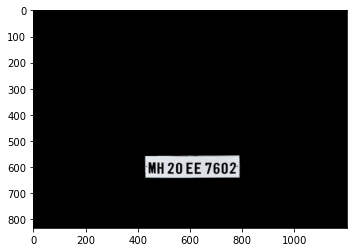

In [37]:
plt.imshow(new_image)
plt.show()

## Issolating the plate Number segment 

In [38]:
(x,y) = np.where(mask==255) # finding the sections where image is black 
(x1,y1) = (np.min(x),np.min(y)) # finding the minimum of x and y 
(x2,y2) = (np.max(x), np.max(y)) # Maximum
cropped_image = gray[x1:x2+1 , y1:y2+1] # Adding 1 for little buffer above the cropped image 

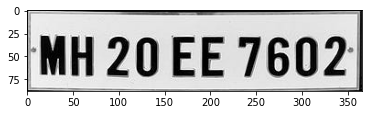

In [39]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))
plt.show()

## Reading Text from the image Using EasyOCR

In [40]:
reader = easyocr.Reader(["en"]) # Using English as Language 
result = reader.readtext(cropped_image)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [41]:
result

[([[7, 17], [359, 17], [359, 83], [7, 83]],
  'MH 20 EE 7602',
  0.9949597052376054)]

### Rendering the Result 
+ Displaying the Text on the Image 

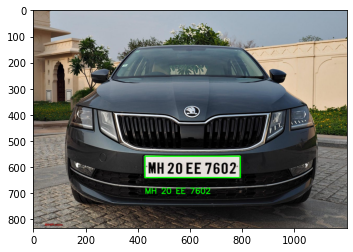

In [42]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(image, text=text, org = (approx[0][0][0], approx[1][0][1]+60),
                 fontFace = font, fontScale = 1, color = (0,255,0), thickness = 2,
                 lineType = cv2.LINE_AA)
res = cv2.rectangle(image, tuple(approx[0][0]), tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))
plt.show()

**Thank You !**  
**Olatunde**